In [1]:
import pandas as pd

In [2]:
cs_file = '../data/SMB_input_belli_ERA5.csv'

df1 = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date'],
    parse_dates=['Date'], na_values='NAN')

cs_file = '../data/SMB_input_four_ERA5.csv'

df = pd.read_csv(cs_file,
    delimiter='\t', index_col=['Date'],
    parse_dates=['Date'], na_values='NAN')


In [3]:
features_to_drop = ['Stake', 'Latitude','Longitude', 'SMB']

df_train_X = df.drop(features_to_drop, axis=1)
df_train_y = df[['SMB']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df1.drop(features_to_drop, axis=1)
df_validation_y = df1[['SMB']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [11]:
import sys
sys.path.append('../')
from utilities.ML_algorithms import create_RF_model, create_XGB_model, create_ANN_model
from utilities.plot_results import plot_prediction 

In [12]:
%%time
RF_model = create_RF_model()
RF_model.fit(X_train, y_train)

<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 12.7 s, sys: 22.6 ms, total: 12.7 s
Wall time: 12.9 s


RandomForestRegressor(criterion='absolute_error', max_depth=4, max_features=10,
                      min_samples_split=5, n_estimators=300)

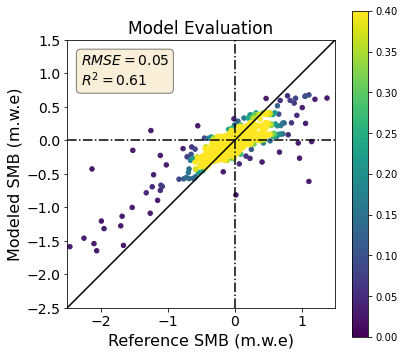

In [13]:
plot_prediction(y_train, RF_model.predict(X_train), n_toplot=5000)

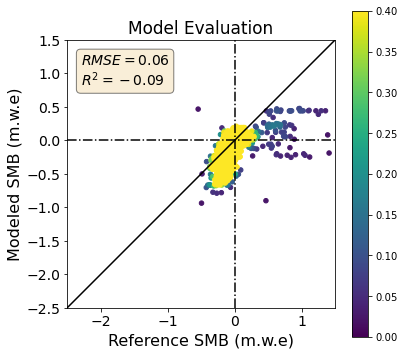

In [14]:
plot_prediction(y_validation, RF_model.predict(X_validation), n_toplot=5000)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

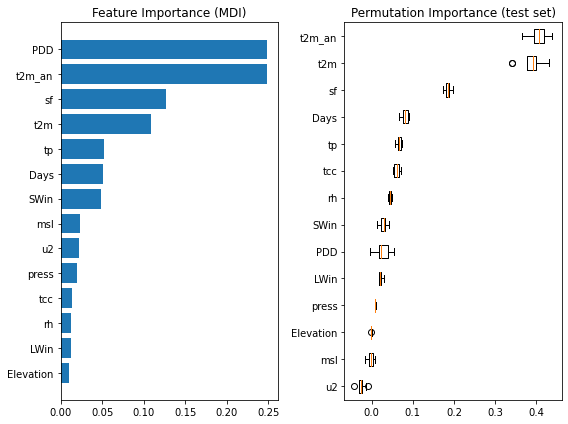

In [16]:
feature_importance = RF_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    RF_model, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


In [17]:
%%time
XGB_model = create_XGB_model()
XGB_model.fit(X_train, y_train)

/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 3.37 s, sys: 7.24 ms, total: 3.38 s
Wall time: 3.42 s


GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_split=5,
                          n_estimators=300, validation_fraction=0.2)

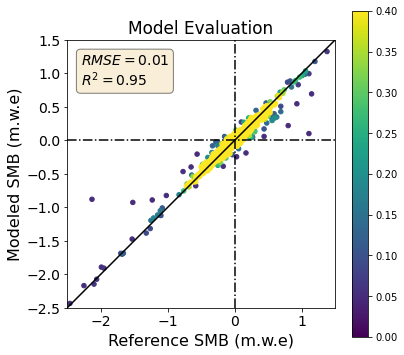

In [18]:
plot_prediction(y_train, XGB_model.predict(X_train), n_toplot=5000)

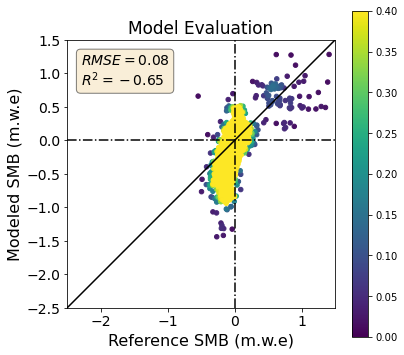

In [19]:
plot_prediction(y_validation, XGB_model.predict(X_validation), n_toplot=5000)

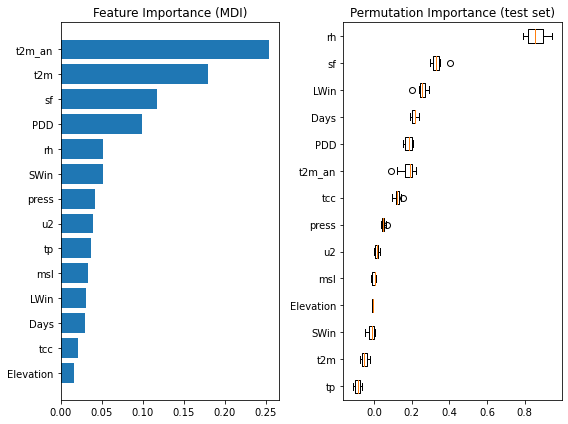

In [20]:
feature_importance = XGB_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    XGB_model, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [21]:
%%time
ANN_model = create_ANN_model()
ANN_model.fit(X_train_scaled, y_train)

/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 5.14 s, sys: 4.44 s, total: 9.58 s
Wall time: 4.95 s


/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(batch_size=100, hidden_layer_sizes=(50, 30, 20, 10),
             learning_rate='adaptive', solver='lbfgs')

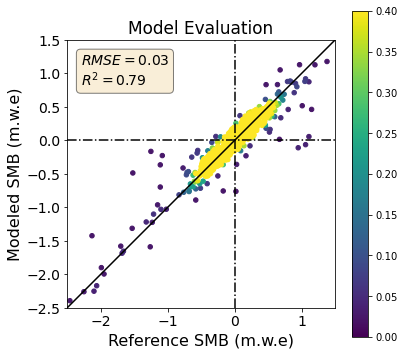

In [22]:
plot_prediction(y_train, ANN_model.predict(X_train_scaled), n_toplot=5000)

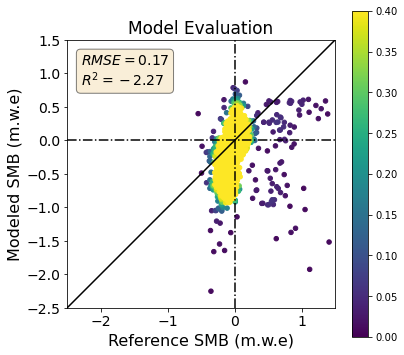

In [23]:
plot_prediction(y_validation, ANN_model.predict(X_validation_scaled), n_toplot=5000)